In [1]:
import opendatasets as od
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.dpi'] = (120)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [4]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [5]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

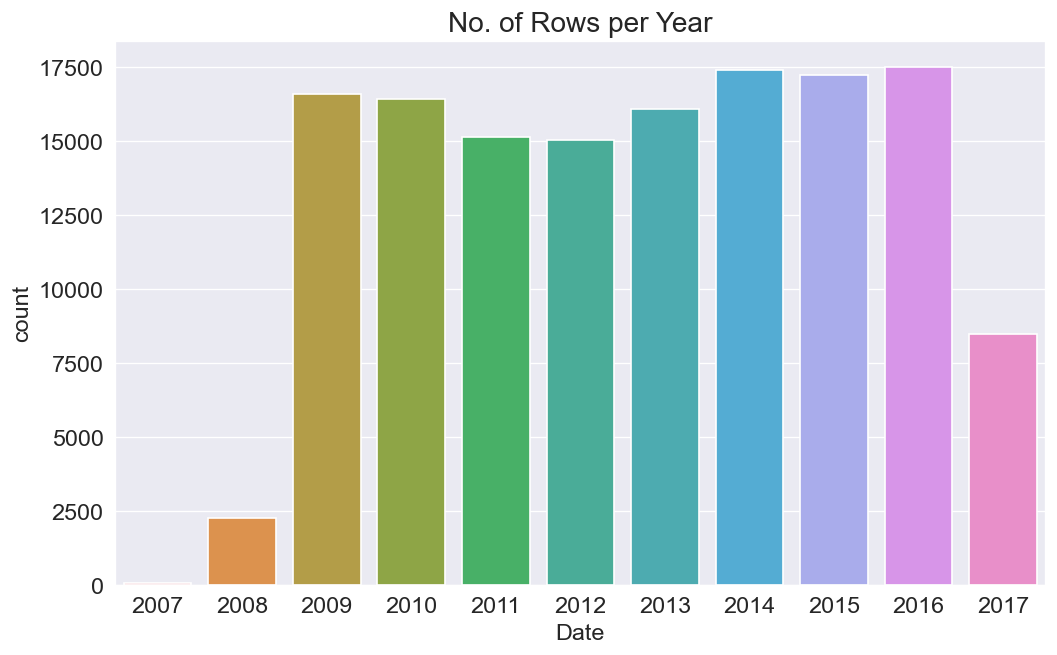

In [8]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

## Preparing the Data for Training

In [9]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [10]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [11]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [12]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

#### identify the numeric and categorical columns

In [13]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [14]:
print("numeric_cols: {}".format(numeric_cols))
print('\n')
print("categorical_cols: {}".format(categorical_cols))

numeric_cols: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


categorical_cols: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### Imputing missing numeric values

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
train_inputs[numeric_cols].isna().sum().sort_values(ascending = False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

In [17]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [18]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [19]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Scaling Numeric Features


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
val_inputs.describe().loc[['min', 'max']]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min     -8.2     -3.2       0.0          0.0       0.0            7.0   
max     31.9     45.4     247.2         70.4      14.5          135.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min           0.0           0.0          4.0          0.0        988.1   
max          87.0          74.0        100.0        100.0       1039.3   

     Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
min        982.2       0.0       0.0     -6.2     -4.0  
max       1037.3       8.0       8.0     37.5     42.8

In [22]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [23]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [24]:
val_inputs.describe().loc[['min', 'max']]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.007075  0.030246  0.000000     0.000000       0.0       0.007752   
max  0.952830  0.948960  0.666307     0.485517       1.0       1.000000   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min      0.000000      0.000000         0.04          0.0     0.125620   
max      0.669231      0.850575         1.00          1.0     0.971901   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min       0.0816  0.000000  0.000000  0.021097  0.026871  
max       0.9632  0.888889  0.888889  0.943038  0.925144

### OneHotEncoder

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
train_inputs[categorical_cols].isna().sum().sort_values(ascending = False)

WindDir9am     7323
WindGustDir    6943
WindDir3pm     2030
RainToday      1000
Location          0
dtype: int64

In [27]:
# !pip list

In [28]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('Unknown')

In [29]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols)) # show feature name
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [30]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]).copy()
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols]).copy()
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols]).copy()

/Users/zll/Library/Mobile Documents/com~apple~CloudDocs/Python Data Science/venv/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/Users/zll/Library/Mobile Documents/com~apple~CloudDocs/Python Data Science/venv/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/Users/zll/Library/Mobile Documents/com~apple~CloudDocs/Python Data Science/venv/lib/python3.9/site-packag

In [31]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037723  0.525852   
2499     Albury  0.693396  0.725898  0.001078     0.037723  0.525852   
2500     Albury  0.634434  0.527410  0.005930     0.037723  0.525852   
2501     Albury  0.608491  0.538752  0.042049     0.037723  0.525852   
2502     Albury  0.566038  0.523629  0.018329     0.037723  0.525852   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037723  0.525852   
145455    Uluru  0.266509  0.533081  0.000000     0.037723  0.525852   
145456    Uluru  0.285377  0.568998  0.000000     0.037723  0.525852   
145457    Uluru  0.327830  0.599244  0.000000     0.037723  0.525852   
145458    Uluru  0.384434  0.601134  0.000000     0.037723  0.525852   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093    Unknown        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.493021  0.500352  0.350211  0.504798        No                0.0   
145455  0.493021  0.500352  0.364979  0.533589        No                0.0   
145456  0.493021  0.500352  0.381857  0.573896        No                0.0   
145457  0.493021  0.500352  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

In [32]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98988 entries, 0 to 144552
Columns: 124 entries, Location to RainToday_nan
dtypes: float64(119), object(5)
memory usage: 94.4+ MB


#### drop the textual categorical columns

In [33]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [34]:
X_test

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498    0.681604  0.801512  0.000000     0.037723  0.525852       0.372093   
2499    0.693396  0.725898  0.001078     0.037723  0.525852       0.341085   
2500    0.634434  0.527410  0.005930     0.037723  0.525852       0.325581   
2501    0.608491  0.538752  0.042049     0.037723  0.525852       0.255814   
2502    0.566038  0.523629  0.018329     0.037723  0.525852       0.193798   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.037723  0.525852       0.193798   
145455  0.266509  0.533081  0.000000     0.037723  0.525852       0.193798   
145456  0.285377  0.568998  0.000000     0.037723  0.525852       0.124031   
145457  0.327830  0.599244  0.000000     0.037723  0.525852       0.240310   
145458  0.384434  0.601134  0.000000     0.037723  0.525852       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498        0.000000      0.080460         0.46         0.17     0.543802   
2499        0.069231      0.195402         0.54         0.30     0.505785   
2500        0.084615      0.448276         0.62         0.67     0.553719   
2501        0.069231      0.195402         0.74         0.65     0.618182   
2502        0.046154      0.103448         0.92         0.63     0.591736   
...              ...           ...          ...          ...          ...   
145454      0.115385      0.149425         0.59         0.27     0.730579   
145455      0.100000      0.126437         0.51         0.24     0.728926   
145456      0.100000      0.103448         0.56         0.21     0.710744   
145457      0.069231      0.103448         0.53         0.24     0.669421   
145458      0.100000      0.080460         0.51         0.24     0.642975   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
2498         0.5136  0.777778  0.333333  0.702532  0.808061   
2499         0.5008  0.888889  0.888889  0.675105  0.712092   
2500         0.6032  0.888889  0.888889  0.611814  0.477927   
2501         0.6304  0.888889  0.888889  0.556962  0.518234   
2502         0.5888  0.888889  0.888889  0.514768  0.529750   
...             ...       ...       ...       ...       ...   
145454       0.7056  0.493021  0.500352  0.350211  0.504798   
145455       0.6912  0.493021  0.500352  0.364979  0.533589   
145456       0.6720  0.493021  0.500352  0.381857  0.573896   
145457       0.6352  0.493021  0.500352  0.415612  0.604607   
145458       0.6304  0.333333  0.222222  0.470464  0.602687   

        Location_Adelaide  Location_Albany  Location_Albury  \
2498                  0.0              0.0              1.0   
2499                  0.0              0.0              1.0   
2500                  0.0              0.0              1.0   
2501                  0.0              0.0              1.0   
2502                  0.0              0.0              1.0   
...                   ...              ...              ...   
145454                0.0              0.0              0.0   
145455                0.0              0.0              0.0   
145456                0.0              0.0              0.0   
145457                0.0              0.0              0.0   
145458                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
2498                      0.0                     0.0                0.0   
2499                      0.0                     0.0                0.0   
2500                      0.0                     0.0                0.0   
2501                      0.0                     0.0                0.0   
2502                      0.0                     0.0                0.0   
...                       ...                     ...                ...   
145454                    0.0                     0.0                0.0   
145455                   

In [35]:
X_train.info() # only numbers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98988 entries, 0 to 144552
Columns: 119 entries, MinTemp to RainToday_nan
dtypes: float64(119)
memory usage: 90.6 MB


### Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier(random_state=42)

In [38]:
%%time
model.fit(X_train, train_targets)

CPU times: user 3.34 s, sys: 57 ms, total: 3.4 s
Wall time: 3.52 s


DecisionTreeClassifier(random_state=42)

### Evaluation using accuracy_score & confusion_matrix

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [41]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [42]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [43]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

In [44]:
model.classes_

array(['No', 'Yes'], dtype=object)

#### Must evaluate the model on the validation set too.

In [45]:
model.score(X_val, val_targets)

0.8101096860309906

In [46]:
val_targets.value_counts() / len(val_targets)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

#### Conclusion：overfitting, It appears that the model has learned the training examples perfect

### Visualization: decision tree learned from the training data.

In [47]:
from sklearn.tree import plot_tree, export_text

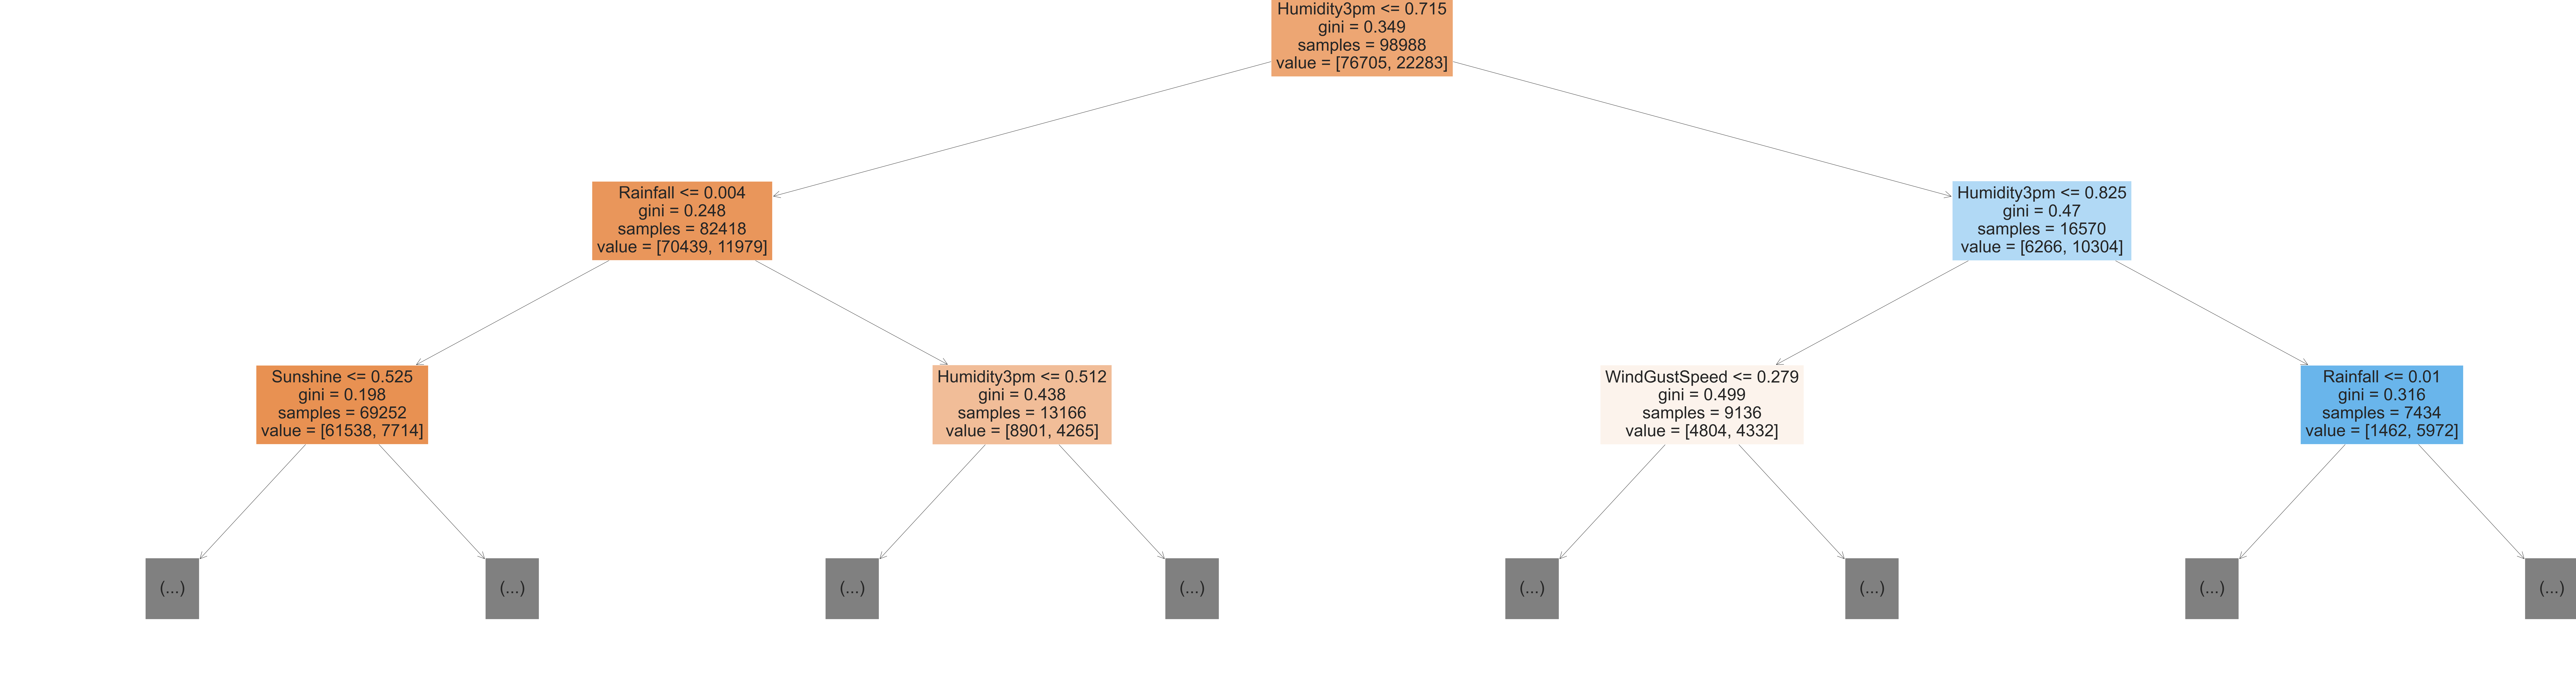

In [48]:
plt.figure(figsize=(90,25))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [49]:
model.tree_.max_depth

48

In [50]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:4000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

### Feature Importance

In [51]:
model.feature_importances_

array([0.03450243, 0.0326979 , 0.0588707 , 0.02398851, 0.04973483,
       0.05536477, 0.02888049, 0.02916332, 0.03948956, 0.26258596,
       0.03464976, 0.06252979, 0.01335156, 0.01832233, 0.03344341,
       0.03103312, 0.00229202, 0.00242598, 0.00137905, 0.00072507,
       0.00153394, 0.00118986, 0.00076956, 0.0015545 , 0.00107346,
       0.00141115, 0.00107036, 0.00196324, 0.00181935, 0.00034969,
       0.00100552, 0.00155723, 0.00046338, 0.00101511, 0.00169162,
       0.00084242, 0.00105612, 0.00086093, 0.00168535, 0.00187041,
       0.00051907, 0.00047732, 0.00149774, 0.00154991, 0.00137383,
       0.00122996, 0.00074085, 0.00140641, 0.0010652 , 0.0021117 ,
       0.00070719, 0.00175523, 0.00097529, 0.00137448, 0.00116001,
       0.00042945, 0.00151262, 0.00034984, 0.00081469, 0.00148406,
       0.00152123, 0.00148832, 0.00265512, 0.0019318 , 0.00033358,
       0.0014037 , 0.00150786, 0.00207691, 0.00347399, 0.00252085,
       0.00225861, 0.00221304, 0.00333089, 0.00219937, 0.00302

In [52]:
X_train.columns # feature_names=list(X_train.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

In [53]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [54]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.262586
11    Pressure3pm    0.062530
2        Rainfall    0.058871
5   WindGustSpeed    0.055365
4        Sunshine    0.049735
8     Humidity9am    0.039490
10    Pressure9am    0.034650
0         MinTemp    0.034502
14        Temp9am    0.033443
1         MaxTemp    0.032698

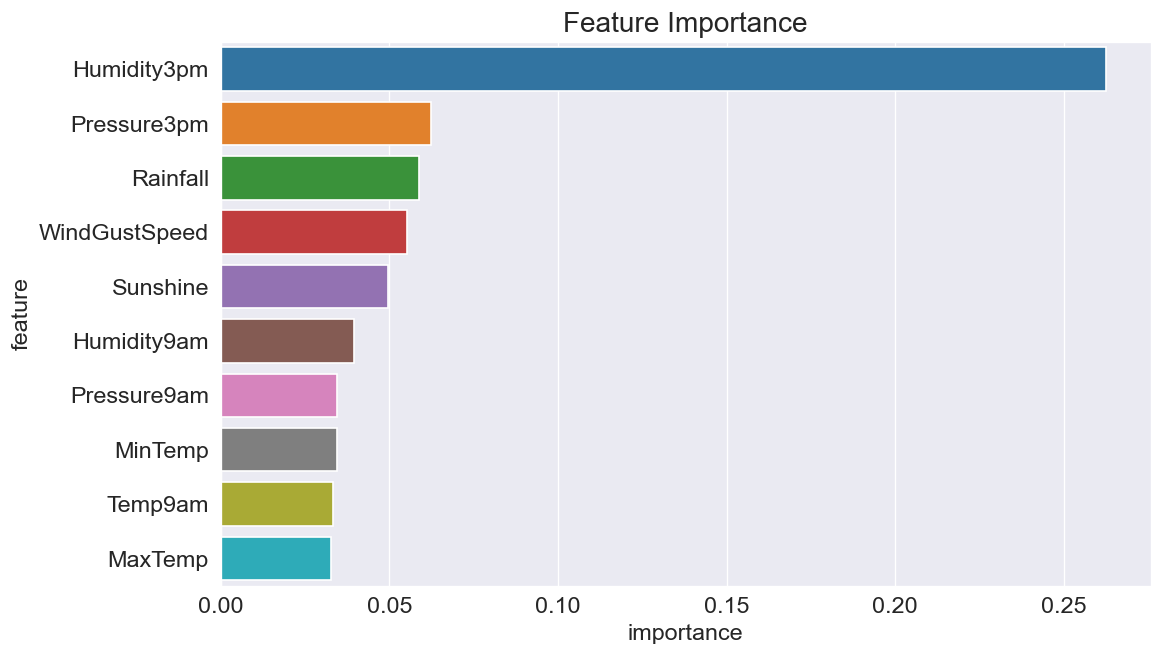

In [55]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning and Overfitting

In [56]:
# ?DecisionTreeClassifier

In [57]:
model_depth = DecisionTreeClassifier(max_depth=3, random_state=42)

In [58]:
model_depth.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [59]:
model_depth.score(X_train, train_targets)

0.8291308037337859

In [60]:
model_depth.score(X_val, val_targets)

0.8334397307178921

In [61]:
model_depth.classes_

array(['No', 'Yes'], dtype=object)

[Text(3255.0, 1981.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(1627.5, 1415.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]\nclass = No'),
 Text(813.75, 849.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]\nclass = No'),
 Text(406.875, 283.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(1220.625, 283.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(2441.25, 849.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(2034.375, 283.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(2848.125, 283.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(4882.5, 1415.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(4068.75, 849.375, 'WindGustSpeed <= 0.279\ngini = 0.499\

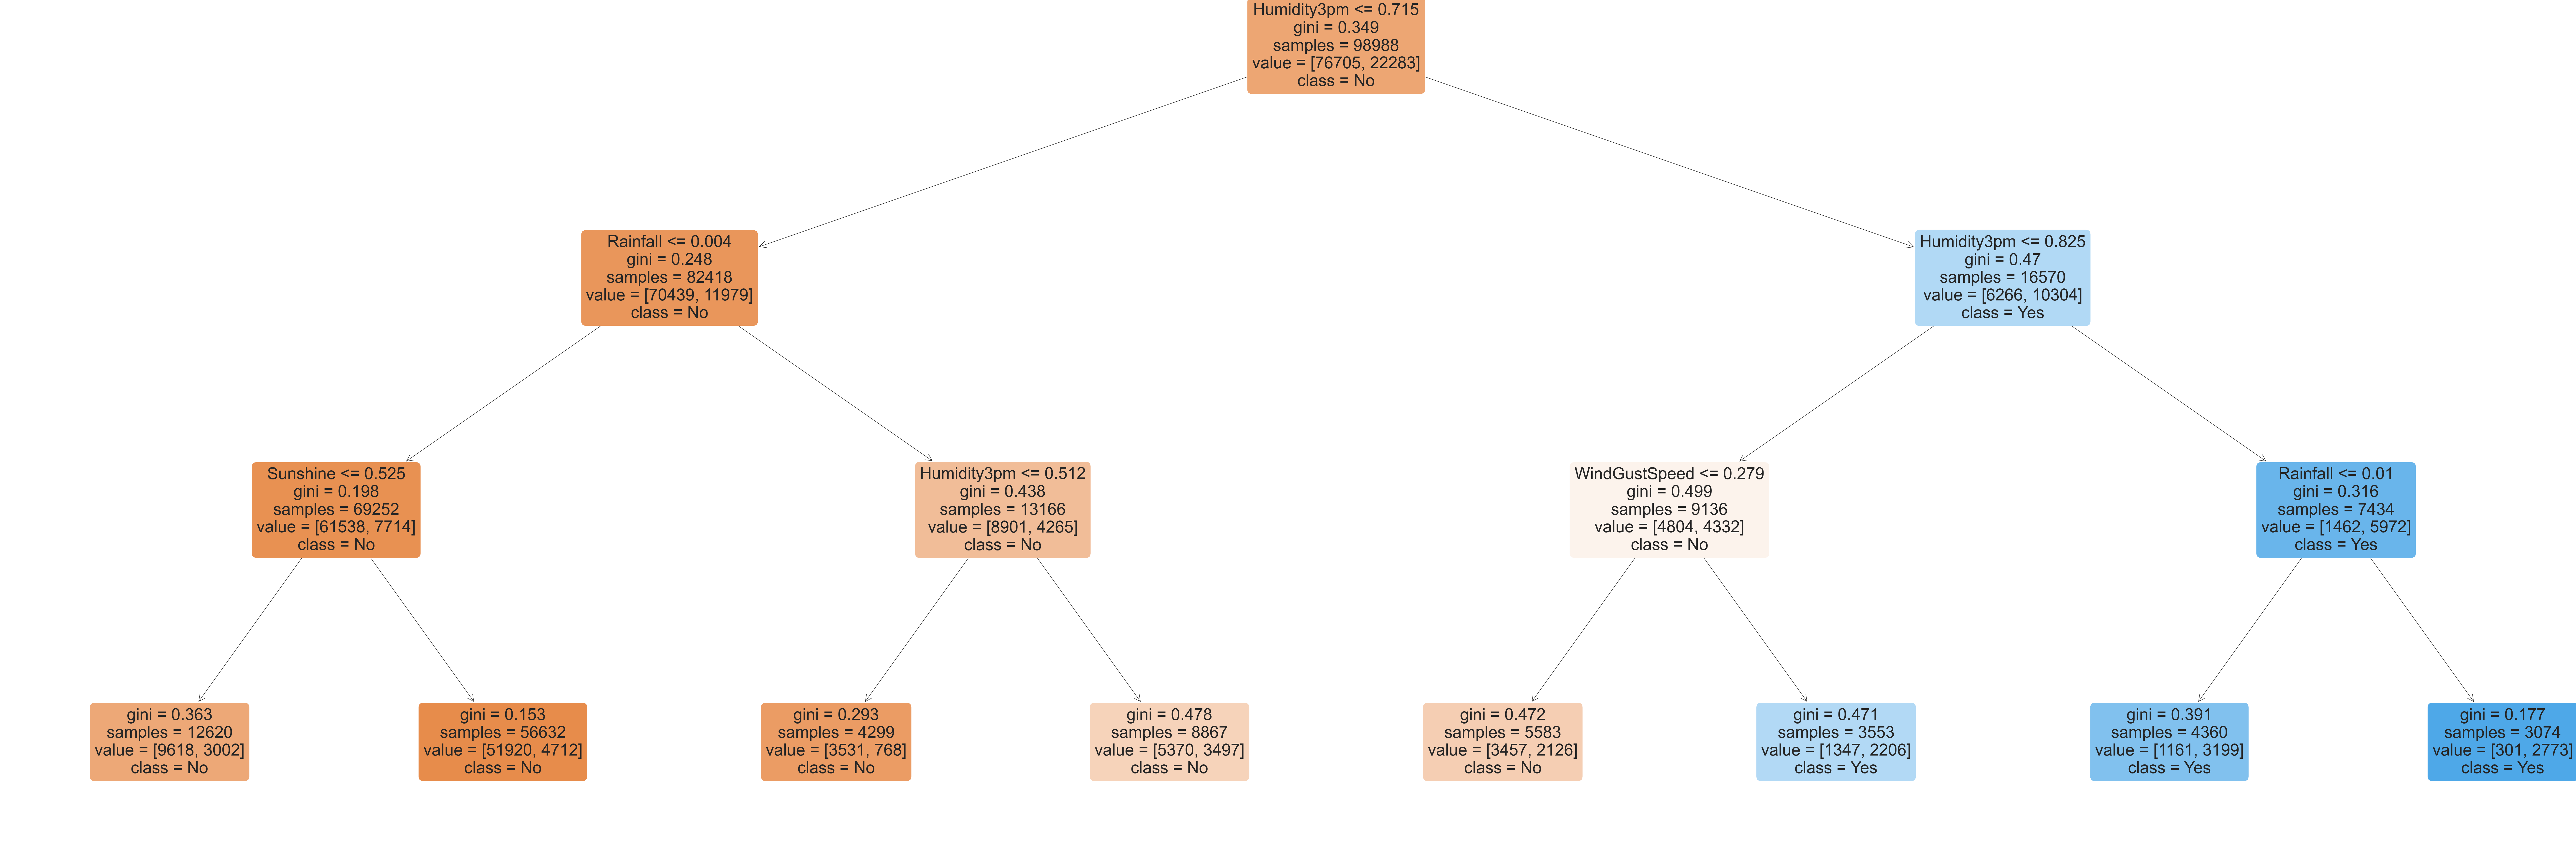

In [62]:
plt.figure(figsize=(70,25))
plot_tree(model_depth, feature_names=X_train.columns, 
          filled=True, rounded=True, class_names=model_depth.classes_)

In [63]:
print(export_text(model_depth, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



### Try  different depths

In [64]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [65]:
%%time
errors_df =pd.DataFrame([max_depth_error(md) for md in range(1, 16)])

CPU times: user 25.8 s, sys: 586 ms, total: 26.4 s
Wall time: 28.9 s


In [66]:
# start from max_depth=7
errors_df

Max Depth  Training Error  Validation Error
0           1        0.184315          0.177935
1           2        0.179547          0.172712
2           3        0.170869          0.166560
3           4        0.165707          0.164355
4           5        0.160676          0.159074
5           6        0.156211          0.157681
6           7        0.153231          0.154837
7           8        0.147644          0.162962
8           9        0.140724          0.169520
9          10        0.132703          0.165748
10         11        0.122934          0.167025
11         12        0.113297          0.167663
12         13        0.101861          0.169926
13         14        0.090001          0.170913
14         15        0.079121          0.173641

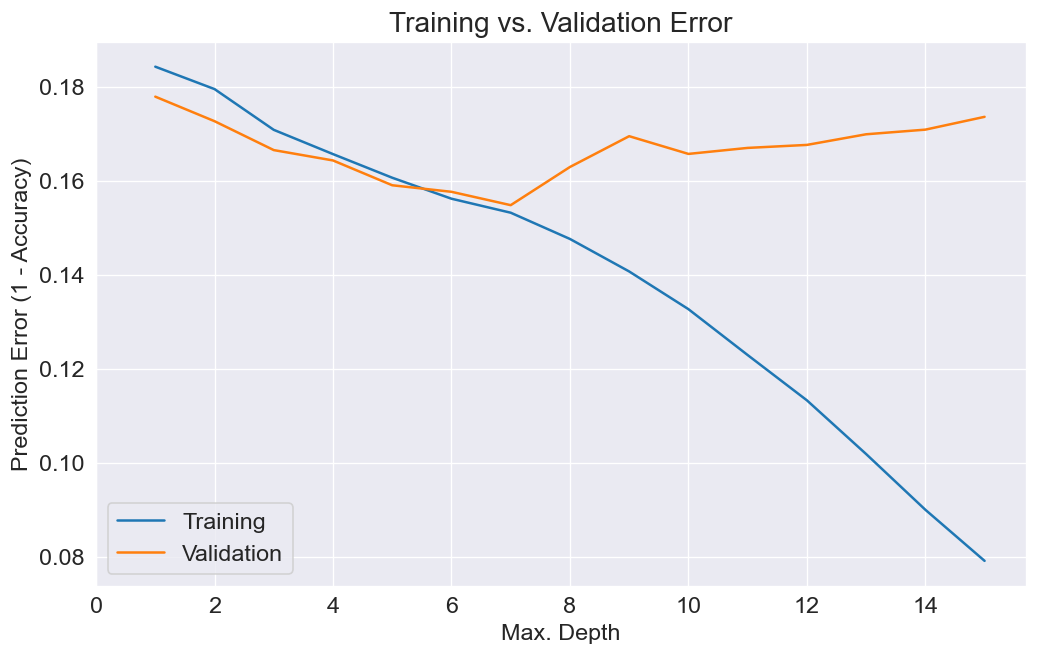

In [67]:
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])

plt.title('Training vs. Validation Error')
plt.xticks(range(0,16, 2))

plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

plt.show()

#### plotly

In [68]:
import plotly.graph_objects as go

In [69]:
line1 = go.Scatter(x=errors_df['Max Depth'],  y=errors_df['Training Error'], name='Training')
line2 = go.Scatter(x=errors_df['Max Depth'], y=errors_df['Validation Error'], name='Validation')

fig  = go.Figure([line1, line2])

fig.update_layout(
    title = 'Training vs. Validation Error',
    xaxis_title = "Max. Depth",
    yaxis_title = "Prediction Error (1 - Accuracy)",

)
fig.show()


In [70]:
model_1 = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model_1.score(X_val, val_targets)

0.8451627879983751

In [71]:
model_1.tree_.n_leaves

125

### Try different leaf

In [72]:
model_leaf = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [73]:
model_leaf.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [74]:
model_leaf.score(X_train, train_targets)

0.8480421869317493

In [75]:
model_leaf.score(X_val, val_targets)

0.8345423945215019

In [76]:
model_leaf.tree_.max_depth

12

In [77]:
model_leaf_text = export_text(model_leaf, feature_names=list(X_train.columns))
print(model_leaf_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

In [78]:
# plt.figure(figsize=(70,25))
# plot_tree(model_leaf, feature_names=X_train.columns, 
#           filled=True, rounded=True, class_names=model_leaf.classes_)

#### 该模型能够为某些路径实现更大的深度 12，同时保持其他路径更短。
https : //scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [79]:
def model_leaf_error(mln):
    model = DecisionTreeClassifier(max_leaf_nodes = mln, random_state=42)
    model.fit(X_train, train_targets)
    
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    
    return {'Max leaf nodes': mln, 'Training Error': train_acc, 'Validation Error': val_acc}

In [80]:
%%time
errors_df_leaf =pd.DataFrame([model_leaf_error(mln) for mln in range(30, 100)])

CPU times: user 1min 57s, sys: 2.21 s, total: 1min 59s
Wall time: 2min 8s


In [81]:
errors_df_leaf.tail(25)

Max leaf nodes  Training Error  Validation Error
45              75        0.155938          0.157101
46              76        0.155938          0.157101
47              77        0.155938          0.157101
48              78        0.155938          0.157101
49              79        0.155413          0.157159
50              80        0.155413          0.157159
51              81        0.155413          0.157159
52              82        0.155332          0.157159
53              83        0.155191          0.156404
54              84        0.154463          0.155940
55              85        0.154463          0.155940
56              86        0.154362          0.155824
57              87        0.154362          0.155824
58              88        0.154362          0.155824
59              89        0.154362          0.155824
60              90        0.154362          0.155824
61              91        0.154362          0.155824
62              92        0.154362          0.155824
63              93        0.154362          0.155824
64              94        0.154362          0.155824
65              95        0.154190          0.155708
66              96        0.154180          0.155708
67              97        0.154180          0.155708
68              98        0.153998          0.165109
69              99        0.153998          0.165109

In [82]:
line1 = go.Scatter(x=errors_df_leaf['Max leaf nodes'],  y=errors_df_leaf['Training Error'], name='Training')
line2 = go.Scatter(x=errors_df_leaf['Max leaf nodes'], y=errors_df_leaf['Validation Error'], name='Validation')

fig  = go.Figure([line1, line2])

fig.update_layout(
    title = 'Training vs. Validation Error',
    xaxis_title = "Max. leaf nodes",
    yaxis_title = "Prediction Error (1 - Accuracy)",

)
fig.show()


In [83]:
model_2 = DecisionTreeClassifier(max_leaf_nodes =96,
                               random_state=42).fit(X_train, train_targets)

In [84]:
model_2.score(X_val, val_targets)

0.8442922639428936

In [85]:
model_2.tree_.max_depth

10

max_depth=7 : 0.8451627879983751

# Training a Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [88]:
%%time
model.fit(X_train, train_targets)

CPU times: user 42.5 s, sys: 867 ms, total: 43.4 s
Wall time: 16.8 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [89]:
model.score(X_train, train_targets)

0.9999595910615429

In [90]:
model.score(X_val, val_targets)

0.8498055829609424

In [91]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.92, 0.08],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.93, 0.07]])

####  Individual decision trees using model.estimators_

In [92]:
len(model.estimators_)

100

In [93]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

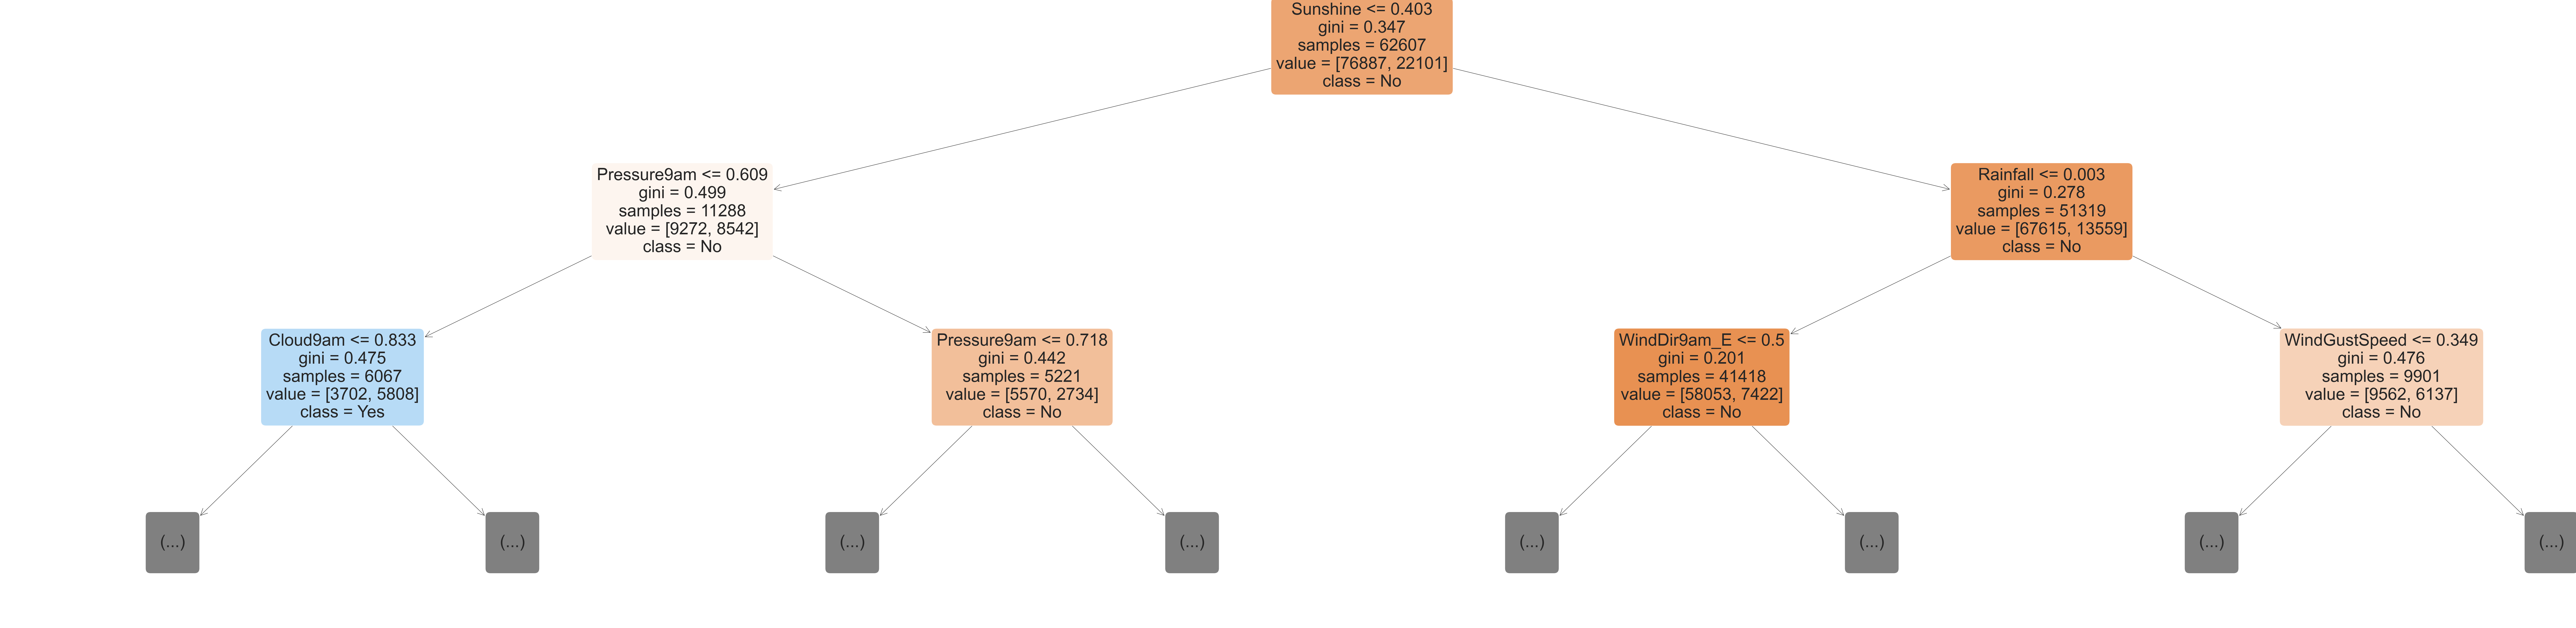

In [94]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, 
          feature_names=X_train.columns, filled=True,
          rounded=True, class_names=model.classes_);

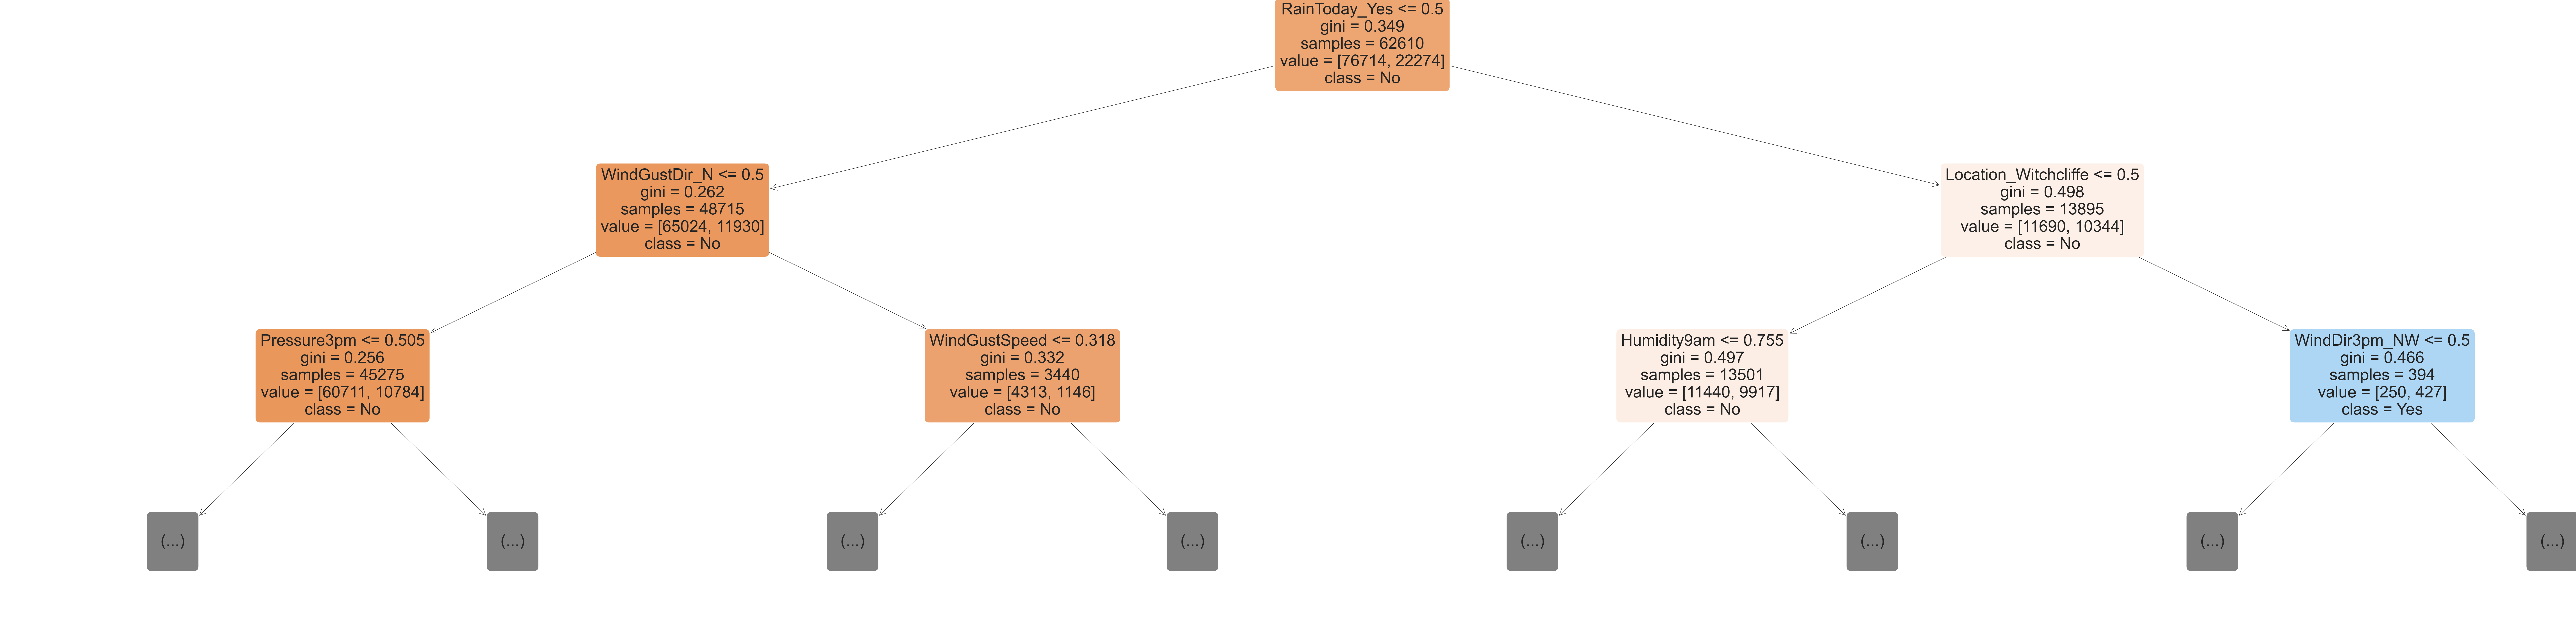

In [95]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, 
          feature_names=X_train.columns, filled=True, 
          rounded=True, class_names=model.classes_);

In [96]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [97]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.139391
4        Sunshine    0.055504
11    Pressure3pm    0.054219
8     Humidity9am    0.050754
10    Pressure9am    0.048210
5   WindGustSpeed    0.047833
2        Rainfall    0.047278
15        Temp3pm    0.045182
1         MaxTemp    0.041811
0         MinTemp    0.041537

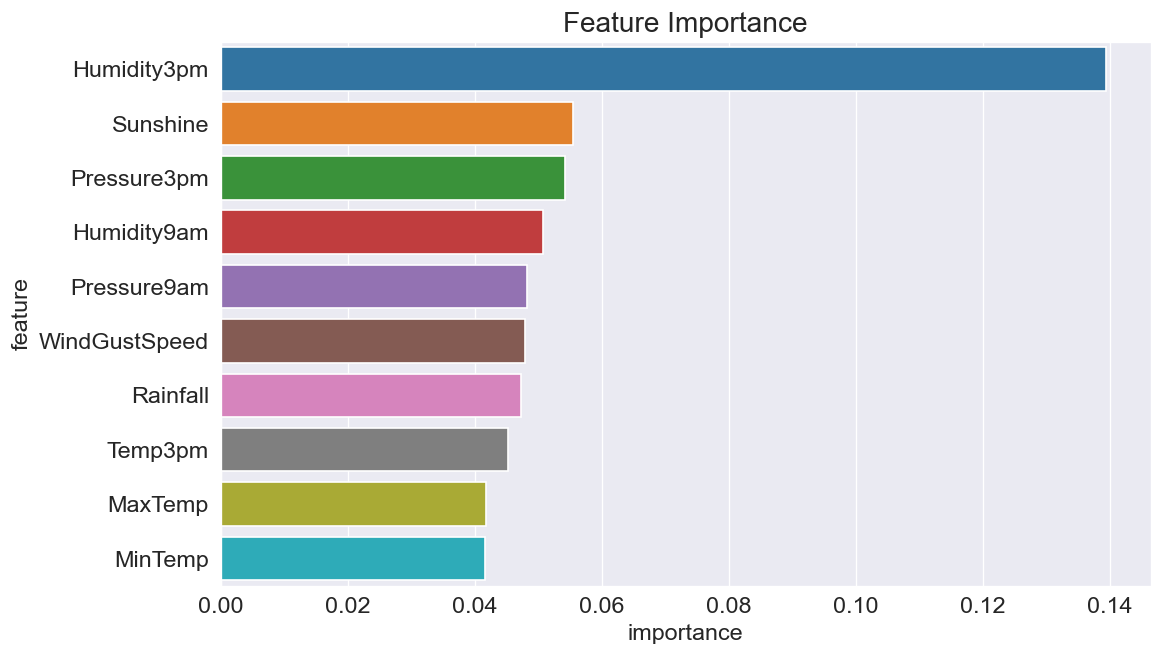

In [98]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# Hyperparameter Tuning with Random Forests

In [99]:
# ?RandomForestClassifier

#### Build a base model :用它来比较具有调整过的超参数的模型
n_jobs=-1意味着使用所有处理器

In [100]:
%%time
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

CPU times: user 44.7 s, sys: 1.11 s, total: 45.8 s
Wall time: 20 s


In [101]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [102]:
type(base_train_acc)

numpy.float64

In [103]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999595910615429, 0.8498055829609424)

### n_estimators compared:

In [104]:
## 10个估算器， 默认为100个
model_t100 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [105]:
model_t100.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [106]:
model_t100.score(X_train, train_targets), model_t100.score(X_val, val_targets)

(0.9872105709783005, 0.8405780279728396)

In [107]:
base_accs

(0.9999595910615429, 0.8498055829609424)

#### 500个估算器和辅助函数

In [108]:
%%time 
model_t500 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model_t500.fit(X_train, train_targets)

CPU times: user 3min 36s, sys: 3.49 s, total: 3min 39s
Wall time: 1min 20s


RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [109]:
model_t500.score(X_train, train_targets),model_t500.score(X_val, val_targets)

(0.9999797955307714, 0.8527073298125472)

In [110]:
base_accs

(0.9999595910615429, 0.8498055829609424)

### Plotly

In [111]:
def model_n_estimators(ne):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=ne)
    model.fit(X_train, train_targets)
    
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    
    return {'estimators': ne, 'Training Error': train_acc, 'Validation Error': val_acc}

In [112]:
%%time
errors_n_estimators =pd.DataFrame([model_n_estimators(ne) for ne in range(5, 20)])

CPU times: user 1min 33s, sys: 2.4 s, total: 1min 35s
Wall time: 42.6 s


In [113]:
errors_n_estimators

estimators  Training Error  Validation Error
0            5        0.021316          0.178167
1            6        0.025781          0.168069
2            7        0.013870          0.168069
3            8        0.017871          0.162034
4            9        0.009900          0.163194
5           10        0.012789          0.159422
6           11        0.007284          0.162440
7           12        0.009728          0.158029
8           13        0.005667          0.159712
9           14        0.007506          0.157449
10          15        0.004495          0.156985
11          16        0.006082          0.157159
12          17        0.003617          0.158319
13          18        0.004970          0.156926
14          19        0.002899          0.156926

In [114]:
line1 = go.Scatter(x=errors_n_estimators['estimators'],  y=errors_n_estimators['Training Error'], name='Training')
line2 = go.Scatter(x=errors_n_estimators['estimators'], y=errors_n_estimators['Validation Error'], name='Validation')

fig  = go.Figure([line1, line2])

fig.update_layout(
    title = 'Training vs. Validation Error',
    xaxis_title = "n. estimators",
    yaxis_title = "Prediction Error (1 - Accuracy)",

)
fig.show()

### max_features  (default = auto)

In [115]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                   **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [116]:
test_params(max_features='log2')

(0.9999494888269285, 0.8493993384017179)

In [117]:
test_params(max_features=30)

(0.9999494888269285, 0.8514885961348732)

In [118]:
test_params(max_features=0.3)

(0.9999494888269285, 0.8520689455051941)

In [119]:
base_accs

(0.9999595910615429, 0.8498055829609424)

### min_samples_split & min_samples_leaf   (default = 2, =1)

In [120]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9620155978502445, 0.8492252335906215)

In [121]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8489311835778074, 0.8460333120538565)

In [122]:
base_accs

(0.9999595910615429, 0.8498055829609424)

### max_depth & max_leaf_nodes

In [123]:
test_params(max_depth=5)

(0.8209681981654342, 0.8150426556787186)

In [124]:
test_params(max_depth=26)

(0.9816543419404372, 0.8524171551273867)

In [125]:
test_params(max_leaf_nodes=2**5)

(0.8303127651836586, 0.8309442284255122)

In [126]:
test_params(max_leaf_nodes=2**20)

(0.9999494888269285, 0.8498636178979746)

In [127]:
base_accs # no max depth or max leaf nodes

(0.9999595910615429, 0.8498055829609424)

### min_impurity_decrease (default = 0.0)

In [128]:
test_params(min_impurity_decrease=1e-7)

(0.9995858083808138, 0.8520689455051941)

In [129]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [130]:
test_params(min_impurity_decrease=1e-10)

(0.9999494888269285, 0.8517787708200336)

In [131]:
base_accs

(0.9999595910615429, 0.8498055829609424)

### bootstrap (default = True) , max_samples

In [132]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8502118275201671)

In [133]:
test_params(max_samples=0.9)

(0.9997575463692568, 0.8513144913237769)

In [134]:
test_params(max_samples=3)

(0.774891906089627, 0.7882885497069235)

In [135]:
base_accs

(0.9999595910615429, 0.8498055829609424)

### class_weight

In [136]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [137]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8500377227090709)

In [138]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999393865923142, 0.8515466310719053)

In [139]:
base_accs

(0.9999595910615429, 0.8498055829609424)

## Put them together

In [140]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [141]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [142]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9916757586778195, 0.8515466310719053)

In [143]:
base_accs

(0.9999595910615429, 0.8498055829609424)

In [144]:
import joblib

In [145]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}


In [146]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [147]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [148]:
test_preds2 = aussie_rain2['model'].predict(X_test)

In [149]:
accuracy_score(test_targets, test_preds2)

0.8452683452683453

## Single input

In [150]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [151]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [152]:
new_input = {'Date': '2021-12-31',
             'Location': 'Uluru',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [153]:
predict_input(model, new_input)

/Users/zll/Library/Mobile Documents/com~apple~CloudDocs/Python Data Science/venv/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



('Yes', 0.7477184499223095)